### Telegram Bot Infrastructure Library

In [1]:
#make sure to update your telegram bot credentials
#import telegram_infrastructure library with all the telegram 
import telegram_infrastructure

### Import Relevant Libraries

In [ ]:
#make sure all these libraries are installed
#pip install fyers_api
#pip install selenium
#pip install dataframe-image

In [6]:
#import fyers libraries
from fyers_api import accessToken
from fyers_api import fyersModel

#import selenium libbraries for login automation to fetch access_token
import selenium
from selenium import webdriver

#import libraries for normal computations
import time
import pandas as pd
import datetime

#import dataframe_image library to export dataframe image
import dataframe_image as dfi

#libraries for enhancing the aesthetics of pandas dataframe
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

### Log

In [46]:
#dataframe to log every step in the OMS
logger = pd.DataFrame(columns=['Datetime','Log','Check'])

### Setup Fyers API First & Save Credentials

In [3]:
#go to https://apidashboard.fyers.in/dashboard
#go to create app page
#enter a desired name for the api
#use 127.0.0.1 as the redirect url
#click create app button to generate app_id and app_session

In [4]:
#make sure that the app just created is approved

In [12]:
#edit yourcredentials in fyers_login_credentials.csv

In [8]:
#fetch login credentials from fyers_login_credentials.csv
login_credentials = pd.read_csv('fyers_login_credentials.csv').iloc[0]
username,password,pan,app_id,secret_id = login_credentials['username'],login_credentials['password'],login_credentials['pan'],login_credentials['app_id'],login_credentials['secret_id']

### Welcome to Fyers API

In [47]:
try:
    #initialize app_id with app id created from Fyers API Dashboard
    app_id = app_id
    #initialize app_secret with app secret created from Fyers API Dashboard
    app_secret = secret_id
    #create an app_session object for fyers api
    app_session = accessToken.SessionModel(app_id, app_secret)
    #authenticate the response
    response = app_session.auth()
    #generate authorization code
    authorization_code = response['data']['authorization_code']
    #log if the Authorization Code is Generated
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Authorization Code Generated','Check':'OK'}
except:
    #print the error message for Authorization Code Not Generated
    print('Response Code Issue')
    #log if the Authorization Code is not Generated
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Authorization Code Not Generated','Check':'NO'}

In [48]:
try:
    #set token with the authorization_code created earlier
    app_session.set_token(authorization_code)
    #log if the token is set
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Token Set','Check':'OK'}
except:
    #print the error message that the Token is Not Set
    print('Token Not Set')
    #log if the token is not set
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Token Not Set','Check':'NO'}

In [49]:
try:
    #generate a token url for further generating an access token
    temp_url = app_session.generate_token()
    #log if the token url is generated
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Token URL Generated','Check':'OK'}
except:
    #print the error message that the Token is Not Generated
    print('Token Cannot be Generated')
    #log if the token is not generated
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Token URL Not Generated','Check':'NO'}

In [51]:
try:
    #login automation for the token url webpage
    driver = webdriver.Safari()
    driver.get(temp_url)
    driver.find_element_by_xpath("//*[@id='fyers_id']").send_keys(username)
    driver.find_element_by_xpath("//*[@id='password']").send_keys(password)
    driver.find_element_by_xpath("//*[@id='pancard']").send_keys(pan)
    driver.find_element_by_xpath("//*[@id='btn_id']").click()
    #sleep in order to complete login process and fetch url with access token
    time.sleep(5)
    #log if Automated Login is Done
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Automated Login Done','Check':'OK'}
except:
    #print the error message if Login Automation was Interrupted
    print('Login Automation Breached')
    #log if the Login Automation is breached
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Login Automation Breached','Check':'NO'}

In [54]:
try:
    #fetch the url of the webpage opened after token url webpage
    url = driver.current_url
    time.sleep(1)
    #fetch the url with access_token
    token = driver.current_url
    #some cleaning to separate the access token
    token = token.split('access_token=')[1]
    #log if Access Token is Generated Successfully
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Access Token Generated Successfully','Check':'OK'}
except:
    #print the error message if Access Token is Not Generated
    print('Access Token Cannot Be Generated')
    #log if Access Token is Not Generated
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Access Token Not Generated','Check':'NO'}

In [56]:
try:
    #assign is_async to False: to stop some ongoing processes
    is_async = False
    fyers = fyersModel.FyersModel(is_async)
    #log if api is async
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Asynchronous API Calls','Check':'OK'}
except:
    #print the error message if api cannot be turned asynchronous
    print('Synchronous API Calls')
    #log the same
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Synchronous API Calls','Check':'NO'}

In [57]:
try:
    #get profile details
    if fyers.get_profile(token = token)['code'] == 200:
        profile_details = pd.DataFrame(fyers.get_profile(token = token)['data'])
        #log if the profile is accessible
        logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Profile Accessible','Check':'OK'}
except:
    #if profile not found send the relevant message
    print('Profile Not Found LOL')
    #log if the profile is not accessible
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Profile Not Accessible','Check':'NO'}

In [59]:
try:
    #get fund details
    if fyers.funds(token = token)['code'] == 200:
        fund_details = pd.DataFrame(fyers.funds(token = token)['data']['fund_limit'][-1],index=[0])
        fund_details.columns=['Equity','Commodity','ID','Title']
        #if funds are found +ve or -ve doesn't matter, log Multimillionaire
        logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Multimillionaire','Check':'OK'}
    
except:
    #print the error message if the funds cannot be fetched
    print('Funds Not Found LOL')
    #log broke if the funds are not found
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Brook','Check':'NO'}

In [61]:
try:
    #get holdings
    if fyers.holdings(token = token)['code'] == 200:
        #if holdings not found print no holding
        if fyers.holdings(token = token)['data']['holdings'] == []:
            print('No Holding')
        #else print the holding's
        else:
            holding_details = pd.DataFrame(fyers.holdings(token = token)['data']['holdings'],index=[0])
        #log if this level is working fine
        logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Holdings','Check':'OK'}
except:
    #if some issue in finding holdings print Holdings Not Found
    print('Holdings Not Found LOL')
    #log if the holdings module isn't found
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'No Holdings','Check':'NO'}

No Holding


In [37]:
#type: #1:Limit Order #2:Market Order #3:Stop Order(SL-M) #4:Stoplimit Order(SL-L)
#side: #1:Buy         #-1:Sell
#order_type: #CNC:Equity Only #INTRADAY:All Segments #MARGIN:Derivatives Only #CO:Cover Order #BO:Bracket Order

In [67]:
#required attriutes for giving an order
scrip = "MCX:GOLDPETAL20AUGFUT"
quantity = 1
order_type = 1
trade_side = 1
product_type = "INTRADAY"
limit_price = 5670
logger = logger

try:
    #send an order
    order_punch = fyers.place_orders(token = token,data = {"symbol" : scrip,
                                                           "qty" : quantity,
                                                           "type" : order_type,
                                                           "side" : trade_side,
                                                           "productType" : product_type,
                                                           "limitPrice" : limit_price,
                                                           "stopPrice" : 0,
                                                           "disclosedQty" : 0,
                                                           "validity" : "DAY",
                                                           "offlineOrder" : "False",
                                                           "stopLoss" : 0,
                                                           "takeProfit" : 0})
    #if the message received (json format) shows the order sumitted then print the same
    if order_punch['message'].split('.')[0] == 'Order submitted successfully':
        print('Order Submitted')
        #log if Order Submitted
        logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Order Submitted','Check':'OK'}
    else:
        #if order not submitted successfully then print the message received (json format)
        print(order_punch['message'])
        #if Order Not Submitted log the message received while punching the order
        logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':order_punch['message'],'Check':'OK'}

except:
    #if order not punched
    print('Order Cannot Be Punched, Inspection Required')
    #if error occurs while punching order, log that the investigation is required (check order module)
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Order Investigation Required','Check':'NO'}

RMS:808068159701:RATE NOT WITHIN CKT LIMIT


In [69]:
try:
    #create an orderbook dataframe
    orderbook = pd.DataFrame(fyers.orders(token = token)['data']['orderBook'])
    
    time.sleep(2)
    
    #find the order number for last order punched and match with the orderbook
    filtered_order = orderbook[orderbook['orderNumStatus'] == (order_punch['message'].split(':')[1]+':5')]    
    
    #if the order quantity sent along and filled quantity are same, print order filled
    if int(filtered_order['qty']) == int(filtered_order['filledQty']):
        print('Order Filled')
        #log if the Order is Filled
        logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Order Filled','Check':'OK'}
    else:
        #if the order quantity sent along and filled quantity are not same, print order not filled
        print('Order Not Filled')
        #log if the order not filled
        logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Order Not Filled','Check':'OK'}        
except:
    #if any error occurs in the above module print and log the order punching issue
    print('Order Punching Issue')
    logger.loc[len(logger)] = {'Datetime':(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')),'Log':'Order Punched','Check':'NO'}

Order Not Filled


In [40]:
logger

,Datetime,Log,Check
0,06-08-2020 21:24:36,Authorization Code Generated,OK
1,06-08-2020 21:24:36,Token Set,OK
2,06-08-2020 21:24:36,Token URL Generated,OK
3,06-08-2020 21:24:48,Automated Login Done,OK
4,06-08-2020 21:24:49,Access Token Generated Successfully,OK
5,06-08-2020 21:24:49,Asynchronous API Calls,OK
6,06-08-2020 21:24:49,Profile Accessible,OK
7,06-08-2020 21:24:50,Multimillionaire,OK
8,06-08-2020 21:24:50,Holdings,OK
9,06-08-2020 21:24:51,System is not connected to NSE Equity market,OK


### Highlight The Exceptions ('NO')

In [41]:
#function to highlight any of the NO checks in the log
def highlight_no(series):

    #is_no will go through each column and find for 'NO' message
    is_no = series == 'NO'
    #if 'NO' message found highlight the cell in red color
    return ['background: red' if i else '' for i in is_no] 

#apply the conditional formatting from the function highlight_no
logger = logger.style.apply(highlight_no)

#export the file in png format
dfi.export(logger,'logger.png')

### Save the DF in PNG Format

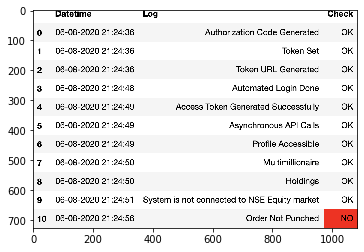

In [42]:
#read image
image = mpimg.imread('logger.png') 
#output the above read image
plt.imshow(image) 

### Send the PNG Image to the Telegram Channel

In [80]:
#send the image to the telegram channel through bot
telegram_infrastructure.bot.send_photo('<your channel name>',photo = open('logger.png','rb'))